In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding, \
ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, \
average_precision_score, roc_auc_score, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix 

from sklearn.exceptions import ConvergenceWarning

from xgboost import XGBClassifier, XGBRFClassifier, plot_importance

from imblearn.over_sampling import SMOTENC

import matplotlib.pyplot as plt

import warnings

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from IPython.display import clear_output


import pickle

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.functions import add_model, test_model, get_timeseries_table

from seaborn import heatmap

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
def model_each_feature(model, verbose=1, save=True,
                   vectorization=None,
                   regularization=None,
                   regularization_strength=None,
                   class_imbalance=None):
    """Takes an unfitted model and optional entries for hyperparameter table and returns 
    the fitted model.
    fits model on each of X_t_clicks, X_t_activities, X_t_product, and all 3 features in X_t.
    Loads hyperparameter table from disk, writes entries for each of the 4 datasets.
    if save=False, will not save over hyperparameter table file on disk.
    if verbose=1, display the hyperparamter table.  
    If verbose = 2+, also display model.score_ and confusion matrix"""
    try:
        h_table = pd.read_csv('hyper_parameter_table.csv')
    except:
        h_table = None
    for train_X, val_X, feature in ((X_t_clicks, X_val_clicks, 'clicks'), 
                                 (X_t_activities, X_val_activities, 'activities'),
                                 (X_t_product, X_val_product, 'activities_x_clicks'),
                                 (X_t, X_val, 'clicks_activities_product_assessments_module')):
        model.fit(train_X, y_t)

        h_table = add_model(model, train_X, y_t, val_X, y_val, 
                                features = feature,
                                table=h_table, 
                                class_imbalance=class_imbalance)
        
        if verbose > 1:
            print(feature)
            test_model(model, val_X, y_val, plot_confusion=True)
            
    if save:
        h_table.to_csv('hyper_parameter_table.csv', index=False)
    if verbose > 0:
        display(h_table)
    return model

In [3]:
prediction_window = 135

df = get_timeseries_table(prediction_window=prediction_window,
                         binary_labels=True, one_hot_modules=True)

X = df.drop(columns=['final_result'])
y = df['final_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=111)

X_train_clicks = X_train.loc[:,X_train.columns.str.startswith('sum_click')]
X_test_clicks = X_test.loc[:,X_test.columns.str.startswith('sum_click')]
X_t_clicks = X_t.loc[:,X_t.columns.str.startswith('sum_click')]
X_val_clicks = X_val.loc[:,X_val.columns.str.startswith('sum_click')]

X_train_activities = X_train.loc[:,X_train.columns.str.startswith('sum_activities')]
X_test_activities = X_test.loc[:,X_test.columns.str.startswith('sum_activities')]
X_t_activities = X_t.loc[:,X_t.columns.str.startswith('sum_activities')]
X_val_activities = X_val.loc[:,X_val.columns.str.startswith('sum_activities')]

X_train_product = X_train.loc[:,X_train.columns.str.startswith('activities_x_clicks')]
X_test_product = X_test.loc[:,X_test.columns.str.startswith('activities_x_clicks')]
X_t_product = X_t.loc[:,X_t.columns.str.startswith('activities_x_clicks')]
X_val_product = X_val.loc[:,X_val.columns.str.startswith('activities_x_clicks')]

assessments merged:  1


h_table = None

In [8]:
model = LogisticRegression(random_state=111, solver='liblinear')
model_each_feature(model, verbose=0)

LogisticRegression(random_state=111, solver='liblinear')

In [9]:
class_imbalance = 'balanced weights'
model = LogisticRegression(class_weight='balanced', random_state=111, solver='liblinear')
model_each_feature(model, class_imbalance=class_imbalance, verbose=0)

LogisticRegression(class_weight='balanced', random_state=111,
                   solver='liblinear')

In [10]:
model = DecisionTreeClassifier(random_state=111)
model_each_feature(model, verbose=0)

DecisionTreeClassifier(random_state=111)

In [11]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=111)
model_each_feature(model, verbose=0, class_imbalance=class_imbalance)

DecisionTreeClassifier(class_weight='balanced', random_state=111)

In [12]:
model = RandomForestClassifier(random_state=111)
model_each_feature(model, verbose=0)

RandomForestClassifier(random_state=111)

In [13]:
model = RandomForestClassifier(class_weight='balanced', random_state=111)
model_each_feature(model, verbose=0, class_imbalance=class_imbalance)

RandomForestClassifier(class_weight='balanced', random_state=111)

In [14]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=111)
model_each_feature(model, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=111, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [15]:
pd.read_csv('hyper_parameter_table.csv')

,model,vectorization,features,regularization,regularization_strength,class_imbalance,train_accuracy,val_accuracy,train_f1_score,val_f1_score
0,XGBClassifier,None,clicks_activities_product_assessments_module,None,None,None,0.972078,0.841369,0.960420,0.761841
1,RandomForestClassifier,None,clicks_activities_product_assessments_module,None,None,None,0.999926,0.825594,0.999896,0.705882
2,RandomForestClassifier,None,clicks_activities_product_assessments_module,None,None,balanced weights,1.000000,0.816263,1.000000,0.692451
3,XGBClassifier,None,activities_x_clicks,None,None,None,0.955192,0.788714,0.937993,0.675980
4,LogisticRegression,None,activities,l2,1.0,None,0.781810,0.775605,0.684852,0.675866
5,DecisionTreeClassifier,None,clicks_activities_product_assessments_module,None,None,None,1.000000,0.760498,1.000000,0.675105
6,DecisionTreeClassifier,None,clicks_activities_product_assessments_module,None,None,balanced weights,1.000000,0.764497,1.000000,0.673645
7,XGBClassifier,None,clicks,None,None,None,0.951192,0.785159,0.932431,0.670752
8,LogisticRegression,None,clicks_activities_product_assessments_module,l2,1.0,balanced weights,0.769442,0.760275,0.677710,0.670131
9,XGBClassifier,None,activities,None,None,None,0.943564,0.783159,0.921362,0.668928


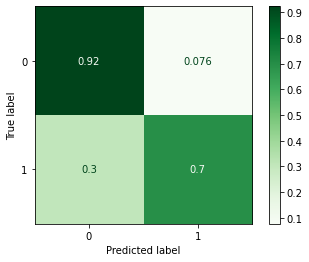

In [16]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_t, y_t)
plot_confusion_matrix(model, X_val, y_val, normalize='true', cmap='Greens')

In [17]:
importance = pd.DataFrame(model.feature_importances_, index=X_t.columns)
importance.sort_values(by=0, ascending=False).head(20)

,0
assess_score_2,0.036475
module_CCC,0.021671
module_GGG,0.019741
sum_activities_131,0.014448
sum_activities_132,0.010385
module_DDD,0.009042
sum_activities_129,0.008449
assess_score_3,0.008227
assess_score_7,0.007535
sum_activities_127,0.007428


In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
model.score(X_test, y_test)
plot_confusion_matrix(model, X_test, y_test, cmap='Greens', normalize='true')

In [19]:
 table = pd.read_csv('hyper_parameter_table.csv')

In [20]:
table = table[['model','train_accuracy','val_accuracy','train_f1_score','val_f1_score']].applymap(lambda x: round(x,2) if type(x) == float else x)

In [50]:
xgb = XGBClassifier(use_label_encoder=False, seed=111, eval_metric='logloss')

xgb_search_space = {'objective': Categorical(['binary:logistic',
                                              'binary:hinge',
                                              'binary:logitraw']),
                   'learning_rate': Real(0.05, .3, 'log-uniform'),
                   'min_child_weight': Integer(1,10, 'uniform'),
                   'max_depth': Integer(3,10, 'uniform'),
                   'subsample': Real(0.5, 1, 'normal'),
                   'colsample_bytree': Real(.5, 1, 'normal'),
                   'scale_pos_weight': Real(.5, 1, 'uniform')}

def return_score(optim_result):
    score = opt.best_score_
    params = opt.best_params_
    clear_output()
    print('Best Score So Far: ', score)
    print('Using Parameters: ', params)

opt = BayesSearchCV(xgb, search_spaces=xgb_search_space, 
                    n_iter=50, cv=2,
                    n_jobs=4,
                    pre_dispatch = 8,
                    random_state=111,
                    return_train_score=True)

opt.fit(X_t, y_t, callback=return_score)

clf = opt.best_estimator_

Best Score So Far:  0.8393571322766997
Using Parameters:  OrderedDict([('colsample_bytree', 0.5880240148213498), ('learning_rate', 0.05), ('max_depth', 10), ('min_child_weight', 10), ('objective', 'binary:logistic'), ('scale_pos_weight', 0.8796599284602726), ('subsample', 0.8752794138071051)])


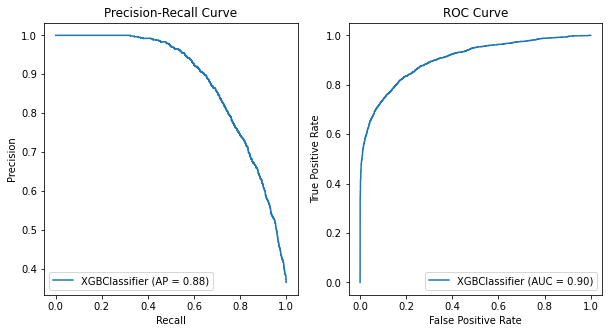

In [51]:
y_score = clf.predict_proba(X_val)[:,1]

fig, axes = plt.subplots(1,2, figsize=(10,5))
plot_precision_recall_curve(clf, X_val, y_val, ax = axes[0])
axes[0].set_title('Precision-Recall Curve')

plot_roc_curve(clf, X_val, y_val, ax= axes[1])
axes[1].set_title('ROC Curve')
plt.show()

In [52]:
thresh_accuracy = pd.DataFrame(columns= ['accuracy', 'f1_score'],
                              index = [x/100 for x in range(60,80)])

thresh_accuracy.index.name = 'Threshold'
for thresh in range(10, 90):
    thresh /= 100
    yhat = pd.Series(y_score).apply(lambda x: 1 if x >= thresh else 0)
    accuracy = accuracy_score(y_val, yhat)
    f1 = f1_score(y_val, yhat)
    roc = roc_auc_score(y_val, y_score)
    pr = average_precision_score(y_val, y_score)
    thresh_accuracy.loc[thresh, 'accuracy'] = accuracy
    thresh_accuracy.loc[thresh, 'f1_score'] = f1

print('ROC_AUC: ', roc)
print('PR_AUC: ', pr)
thresh_accuracy = thresh_accuracy.sort_values(by='f1_score', ascending=False)
thresh_accuracy.head(20)

ROC_AUC:  0.9039147524255775
PR_AUC:  0.8816529972298415


,accuracy,f1_score
Threshold,,
0.37,0.839369,0.774415
0.38,0.840036,0.774011
0.41,0.843146,0.773136
0.39,0.84048,0.773072
0.40,0.841591,0.772858
0.36,0.836925,0.772615
0.42,0.843812,0.772418
0.35,0.83537,0.77221
0.43,0.844701,0.771941


<AxesSubplot:>

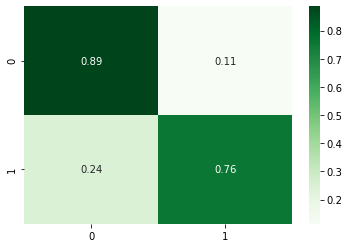

In [53]:
yhat = pd.Series(y_score)
best_thresh = thresh_accuracy.index[0]
yhat = yhat.apply(lambda x: 1 if x >= .37 else 0)

confusion  = confusion_matrix(y_val, yhat, normalize='true')
heatmap(confusion, annot=True, cmap='Greens')

In [54]:
categoricals = [502, 501, 500, 499, 498, 497, 496]
smotenc = SMOTENC(categoricals, random_state=111)
os_X_train, os_y_train = smotenc.fit_resample(X_train, y_train)
os_X_t, os_y_t = smotenc.fit_resample(X_t, y_t)

In [55]:
clf.fit(os_X_t, os_y_t, eval_metric='logloss')
y_score = clf.predict_proba(X_val)[:,1]

thresh_accuracy = pd.DataFrame(columns= ['accuracy', 'f1_score'],
                              index = [x/100 for x in range(60,80)])
thresh_accuracy.index.name = 'Threshold'

for thresh in range(10, 90):
    thresh /= 100
    yhat = pd.Series(y_score).apply(lambda x: 1 if x >= thresh else 0)
    accuracy = accuracy_score(y_val, yhat)
    f1 = f1_score(y_val, yhat)
    roc = roc_auc_score(y_val, y_score)
    pr = average_precision_score(y_val, y_score)
    thresh_accuracy.loc[thresh, 'accuracy'] = accuracy
    thresh_accuracy.loc[thresh, 'f1_score'] = f1

print('ROC_AUC: ', roc)
print('PR_AUC: ', pr)
thresh_accuracy = thresh_accuracy.sort_values(by='f1_score', ascending=False)
thresh_accuracy.head(5)

ROC_AUC:  0.9057468398385109
PR_AUC:  0.8817749393533783


,accuracy,f1_score
Threshold,,
0.46,0.845812,0.779122
0.44,0.843146,0.778822
0.45,0.844701,0.778727
0.47,0.845146,0.777103
0.40,0.836925,0.776764


<AxesSubplot:>

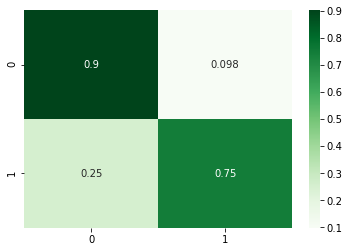

In [56]:
best_thresh = thresh_accuracy.index[0]

yhat = [1 if x >= best_thresh else 0 for x in y_score]

confusion  = confusion_matrix(y_val, yhat, normalize='true')
heatmap(confusion, annot=True, cmap='Greens')